## **OpenCV**: Computer Vision

En este laboratorio, nuestro objetivo será aprender a leer y escribir en videos usando la librería OpenCV. Además, abordaremos los Color Spaces y como estos pueden ayudar en la segmentación de color en imágenes

*Si quisieran aprender más a fondo por su cuenta, les recomiendo esta [página](https://learnopencv.com/getting-started-with-opencv/). Además de esta [página](https://learnopencv.com/reading-and-writing-videos-using-opencv/) para lectura y escritura en videos*

**Qué es OpenCV?**


---

Es una librería de visión artificial creado por Intel en 1999. A día de hoy, sigue siendo una de las librerías más importantes en Computer Vision. Algunas de las aplicaciones más populares de esta librería incluyen:


1.   Detección de Movimiento
2.   Reconocimiento de Objetos
3.   Reconstrucción 3D
4.   Reconocimiento de Caras
5.   Conteo de Objetos/Personas en Movimiento, etc.

OpenCV tiene muchas ventajas:
*   Licencia Libre
*   Multiplataforma
*   Amplia Documentación
*   Conexiones a otros lenguajes (Python, Java, Matlab, Octave, Javascript)










---



# Leer y Guardar Videos

Los videos son, en pocas palabras, una secuencia de imágenes que pasan en un tiempo determinado. Estas imágenes se llaman *frames*.

Para leer un video, podemos extraer este de 3 diferentes origenes:
1. Un directorio: El video está guardado en alguna parte.
2. Una secuencia de imágenes: Los frames ya están divididos y guardados como imágenes individuales.
3. Webcam: Se está mostrando constantemente video.

In [2]:
#Libreria OpenCV
import cv2

Existen 3 funciones básicas que nos permiten realizar acciones en imágenes:
1. imread(filename/path, flag) -> Leer una imagen
2. imshow(Window Name, image) -> Mostrar una imagen
3. imwrite(filename/path, image) -> Guardar una imagen

*Para la función imread, la variable flag puede tomar los valores [1, 0, -1]. Prueben que pasa con cada uno de esos valores*


*Para esta parte, usaremos una imagen cualquiera, que ustedes elijan. Sólo deben asegurarse de que este nombrada como "test.jpg". De todas formas, dejo un enlace a mi [github](https://github.com/conirarra/AyudantiaCV) donde pueden encontrar todas las imágenes que vamos a utilizar en esta ayudantía

1. Leer, mostrar y escribir una imagen

In [3]:
# Colab tiene problemas con la funcion imshow, asi que en vez de usar (window name, image), solo debemos poner (image)
from google.colab.patches import cv2_imshow

In [13]:
img = cv2.imread('test.jpg',1)

cv2_imshow(img)

# Lo que está comentado sirve cuando estamos usando otro software para programar

# cv2.waitKey(0)
# Esta función permite esperar que se aprete una tecla para poder correr las lineas siguientes.
# Entre los parentesis ira el tiempo (en milisegundos) que se esperara (máximo) a que se aprete una tecla.
# Si el valor es 0, la espera es indefinida

# cv2.destroyAllWindows()
# Esta funcion cierra las ventanas que se hayan abierto con la funcion imshow

cv2.imwrite('prueba.jpg',img) #si ya existe un archivo llamado por el nombre que escogimos, esta función reescribirá dicho archivo.

Output hidden; open in https://colab.research.google.com to view.

2. Leer, mostrar y escribir un video

Para leer y escribir en videos, tenemos otras funciones que son importantes:

1. VideoCapture(filename/path, apiPreference ([opcional](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html)))
2. get(parámetro a conseguir) -> [lista](https://docs.opencv.org/4.x/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d) de parámetros posibles
3. VideoWriter(filename/path, apiPreference (opcional), fourcc, fps, frameSize[, isColor])

Esta última función tiene 3 parámetros que no hemos explicado anteriormente:


*   **fourcc**: Este hace referencia a la codificación que tendrá nuestro video cuando ya esté guardado (es decir, la extensión del video). La librería ya contiene una función que nos ayuda a especificar esta codificación: VideoWriter_fourcc('M','J','P','G' (para .avi) ó *'MP4V' (para .mp4))
*   **fps**: frames por segundo, cuántas imágenes queremos encajar en un segundo de video (mientras más frames, más fluido se ve el video)
*   **frameSize[, isColor]**: frameSize será una tupla que contiene 3 valores: Frame Width, Frame Height y isColor.


Frames per second :  25.011331420641746 FPS
Frame count :  755.0


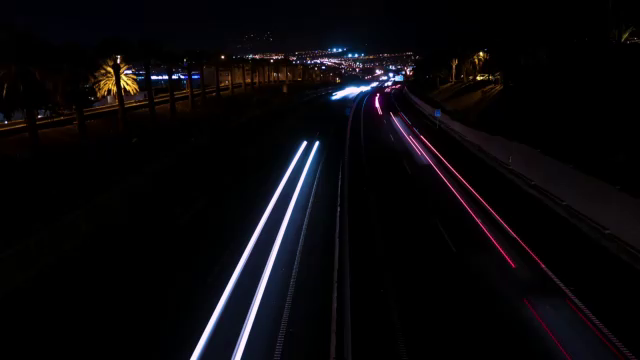

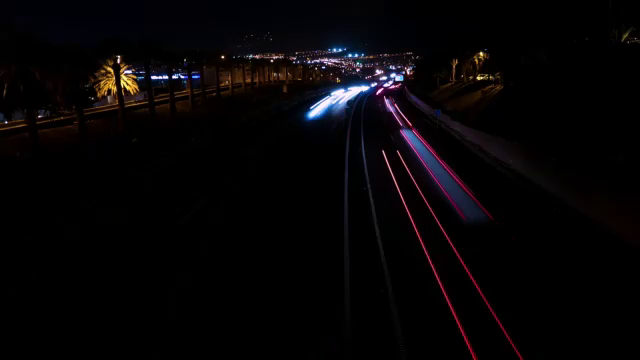

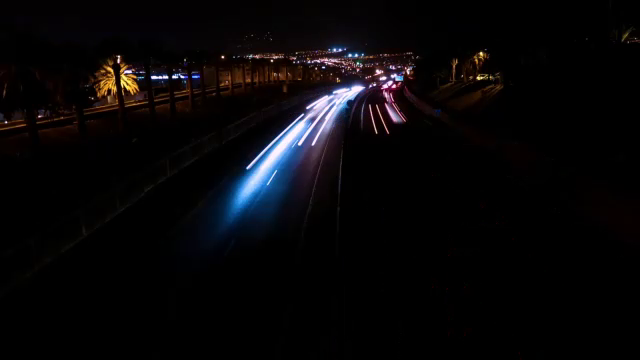

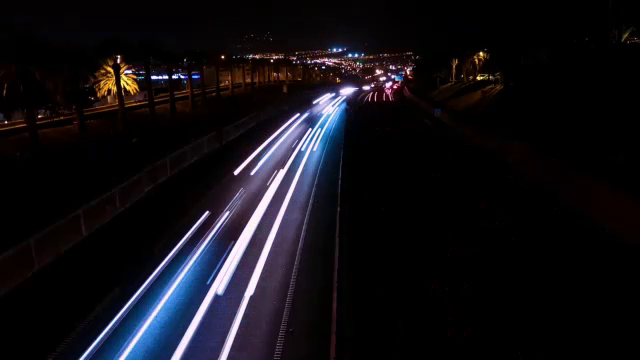

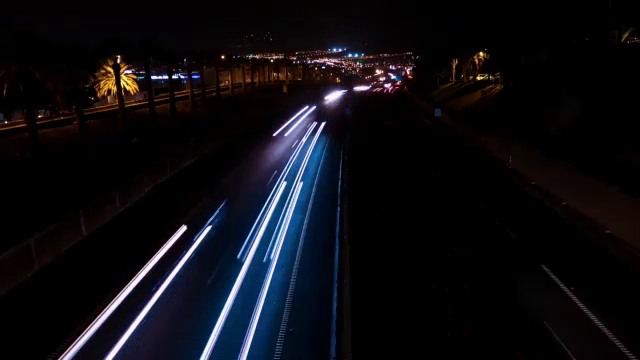

In [22]:
# Leer desde un directorio

vid_capture = cv2.VideoCapture('Cars.mp4')

# isOpened() comprueba que el archivo ha sido abierto correctamente. Esta función devuelve False si hubo algun problema
# y True si se pudo abrir el archivo bien

if (vid_capture.isOpened() == False):
  print("Error opening the video file")

else:
  # Variable para sacar frame rate information (también se puede poner CAP_PROP_FPS en vez de 5)
  fps = vid_capture.get(5)
  print('Frames per second : ', fps,'FPS')

  # Variable para sacar frame count (también se puede poner  CAP_PROP_FRAME_COUNT en vez de 7)
  frame_count = vid_capture.get(7)
  print('Frame count : ', frame_count)

#Ciclo Infinito mientras el archivo este abierto correctamente

# variable para no mostrar todos los frames (solo porque es una demostracion)
frame_counter = 0

while(vid_capture.isOpened()):
  # vid_capture.read() devuelve una tupla donde el primer elemento es un booleano del estado del frame,
  # y el segundo elemento es el frame en sí
  ret, frame = vid_capture.read()
  if ret == True:
    # esto es para mostrar solo 5 frames porque son muchos, en un código real esto no debe ser añadido, solo el imshow()
    # Mostrar solo los primeros 5 frames
        if frame_counter < 5:
            cv2_imshow(frame)
            frame_counter += 1
        else:
            break  # Sale del ciclo después de 5 frames

    # Las siguientes líneas no funcionan en Google Colab

    # key = cv2.waitKey(20)

    # if key == ord('q'):  -> la comparación debe siempre ser con el valor ASCII de la letra que nosotros queremos para cerrar las ventanas
    #                         la función ord() permite sacar ese valor sin tener que buscarlo
      # break

  else:
    break

# Soltar el archivo y cerrar las ventanas abiertas
vid_capture.release()
cv2.destroyAllWindows()

In [13]:
# Leer desde una secuencia de imágenes

# Las imágenes deben estar guardadas bajo una notación específica. Esta, usualmente, contiene una palabra común
# y luego un conteo progresivo en base a cuántos frame hay. Para especificar que el código debe tomar todos
# los frames guardados, se usará "palabra_común%cantidad_de_digitosd.jpg" (hay una d al final de la cantidad de digitos, esto no
# es un error, debe ir así)

vid_capture = cv2.VideoCapture('Resources/Image_sequence/Cars%04d.jpg')
# en este caso, las imágenes guardadas tienen por nombre Cars0001.jpg, Cars0002.jpg, Cars0003.jpg, etc.

In [7]:
# Leer video desde una webcam

# Se usarán números para acceder a la grabación de la webcam. Si tenemos una integrada, la variable es 0. Si tenemos más conectadas,
# los valores iran subiendo de forma ascendente (1, 2, 3, etc.)
vid_capture = cv2.VideoCapture(0, cv2.CAP_DSHOW)

#cv2.CAP_DSHOW es un parámetro opcional, que basicamente asegura que estamos recibiendo la grabación sin ningun tipo de intervención.

3. Guardar un video

In [25]:
# Utilizaremos la función get para obtener la metadata correspondiente al ancho y alto de la imagen
# y luego la guardaremos en una variable tupla.

# Podemos usar CAP_PROP_FRAME_WIDTH en vez de 3, y CAP_PROP_FRAME_HEIGHT en vez de 4. La salida de la función get debe ser
# transformada a número, por lo que usaremos la función int() para eso.
frame_width = int(vid_capture.get(3))
frame_height = int(vid_capture.get(4))

frame_size = (frame_width,frame_height)

fps = 20

In [26]:
output = cv2.VideoWriter('output_video_from_file.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 20, frame_size)

# Para guardarlo con extensión .mp4 quedaría de esta forma:
# output = cv2.VideoWriter('output_video_from_file.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 20, frame_size)

# Color Spaces

Veremos 4 tipos de Color Spaces:

1. RGB: usando valores del 0 al 255 en los siguientes canales -> R (Red), G (Green), B (Blue)

2. LAB: L representa la luminosidad de la imagen, A representa los colores del Verde al Magenta, B representa los colores del Azul al Amarillo

3. YCrCb: Y representa la luminosidad de la imagen RGB después de pasar por una correción gama, Cr representa la distancia del color Rojo hasta la variable Y, Cb representa la distancia del color Azul hasta la variable Y

4. HSV: H representa Hue (Matiz en español) de los colores, S representa la saturación de la imagen, V representa la intensidad de la imagen

Desventajas de cada Color Space


*   **RGB** -> Falta relevante de uniformidad perceptiva, combinación de la data de *chrominance* (colores) y *luminance* (luminosidad)
*   **LAB** -> Usa 16 bits por canal, es decir, cuanto más amplia es la gama de colores de un perfil, menos suaves son los degradados entre unos tonos y otros
*   **YCrCb** -> Problemas de conversión a otros Color Spaces, dificil para análisis visual humano
*   **HSV** -> Problemas de manipulación de colores oscuros y brillantes, Distorsiones en la representación de colores


1. Mostrar imágenes usando Color Space RGB

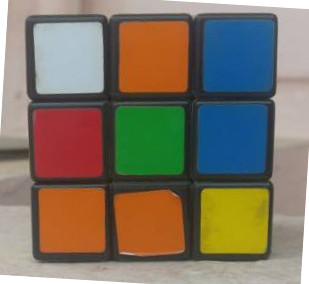

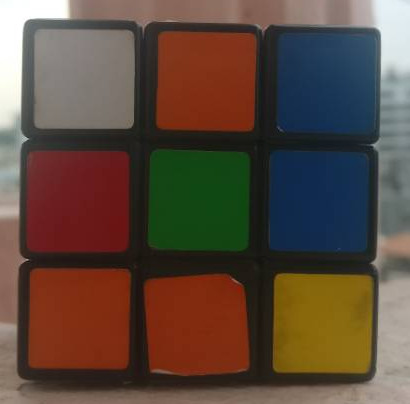

In [6]:
bright = cv2.imread('images/rub04.jpg')
dark = cv2.imread('images/rub02.jpg')

cv2_imshow(bright)
cv2_imshow(dark)

2. Mostrar imágenes en Color Space LAB

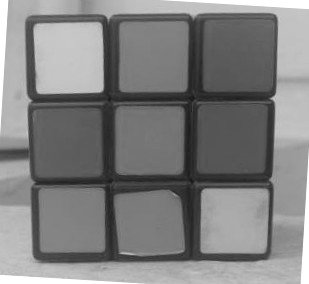

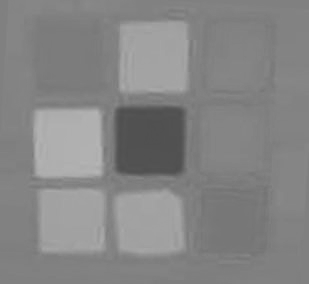

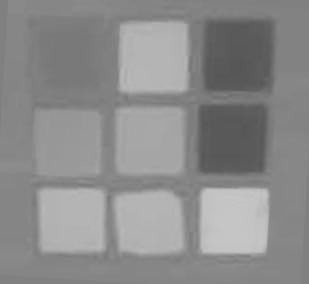

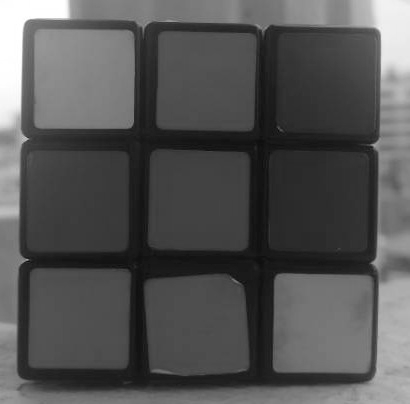

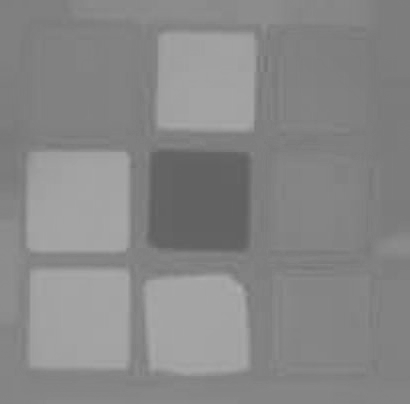

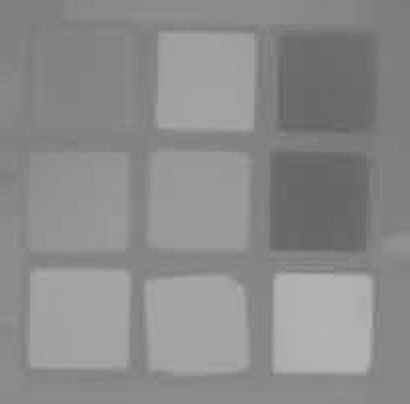

In [10]:
brightLAB = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(dark, cv2.COLOR_BGR2LAB)

# split() nos permite separar los canales para poder mostrarlos
L_bright, A_bright, B_bright = cv2.split(brightLAB)
L_dark, A_dark, B_dark = cv2.split(darkLAB)

cv2_imshow(L_bright)
cv2_imshow(A_bright)
cv2_imshow(B_bright)

cv2_imshow(L_dark)
cv2_imshow(A_dark)
cv2_imshow(B_dark)

# Vean si encuentran una forma de mostrar las imagenes por pantalla con forma de matriz 3x2 -> tareita

3. Mostrar imágenes en Color Space YCrCb

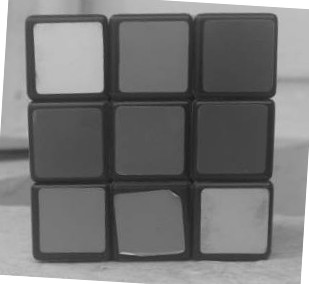

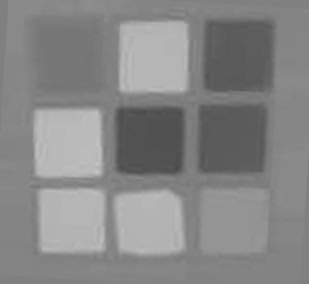

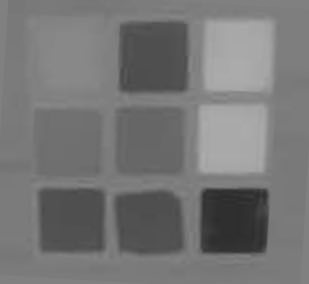

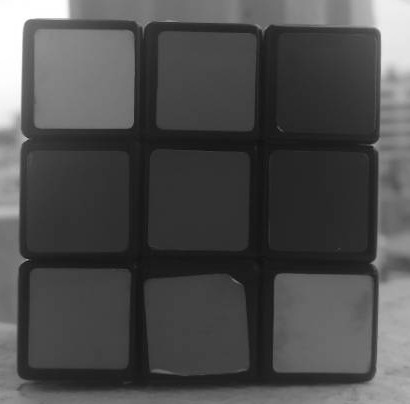

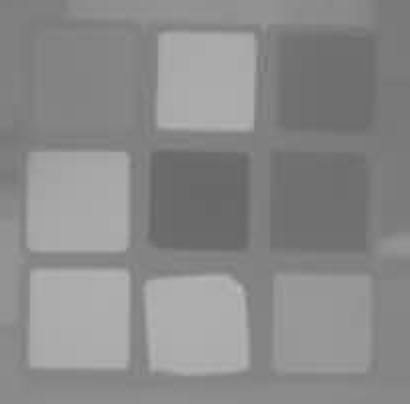

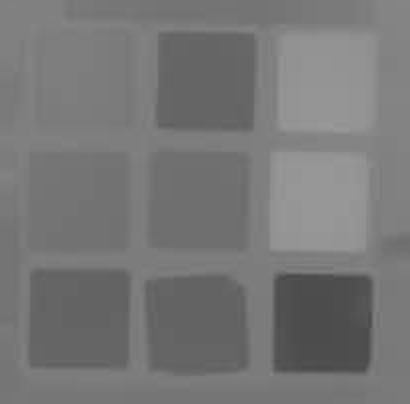

In [11]:
brightYCB = cv2.cvtColor(bright, cv2.COLOR_BGR2YCrCb)
darkYCB = cv2.cvtColor(dark, cv2.COLOR_BGR2YCrCb)

Y_bright, Cr_bright, Cb_bright = cv2.split(brightYCB)
Y_dark, Cr_dark, Cb_dark = cv2.split(darkYCB)

cv2_imshow(Y_bright)
cv2_imshow(Cr_bright)
cv2_imshow(Cb_bright)

cv2_imshow(Y_dark)
cv2_imshow(Cr_dark)
cv2_imshow(Cb_dark)

4. Mostrar imágenes en Color Space HSV

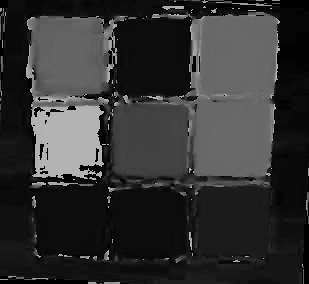

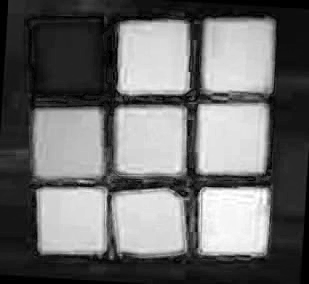

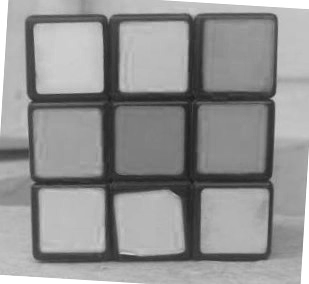

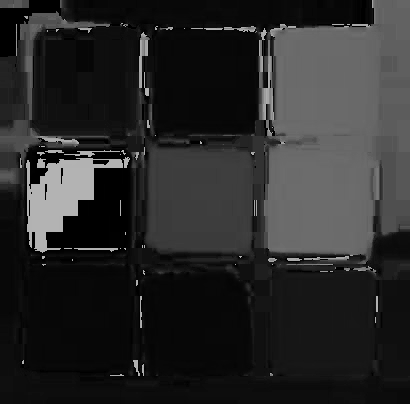

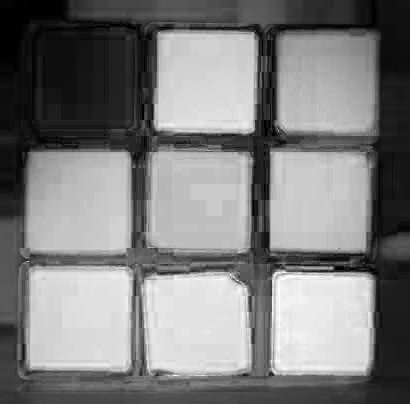

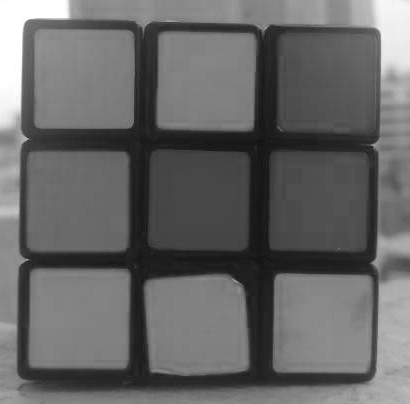

In [12]:
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)

H_bright, S_bright, V_bright = cv2.split(brightHSV)
H_dark, S_dark, V_dark = cv2.split(darkHSV)


cv2_imshow(H_bright)
cv2_imshow(S_bright)
cv2_imshow(V_bright)

cv2_imshow(H_dark)
cv2_imshow(S_dark)
cv2_imshow(V_dark)

# Color Spaces y Segmentacion de Color

1. Sacar los valores exactos de un color en particular

In [17]:
# Color Verde
bgr = [40, 158, 16]
hsv = [62, 229, 158]
YCrCb = [102, 67, 93]
lab = [145, 71, 177]

2. Aplicar intervalo de error a los valores
*Usaremos solo RGB, quedará como tarea para ustedes hacer el resto de Color Spaces*

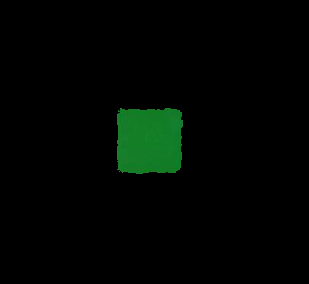

In [18]:
import numpy as np

# Cambien este valor, a ver que pasa c:
thresh = 40

minBGR = np.array([bgr[0] - thresh, bgr[1] - thresh, bgr[2] - thresh])
maxBGR = np.array([bgr[0] + thresh, bgr[1] + thresh, bgr[2] + thresh])

maskBGR = cv2.inRange(bright,minBGR,maxBGR)
resultBGR = cv2.bitwise_and(bright, bright, mask = maskBGR)

cv2_imshow(resultBGR)

3. Usaremos un método analítico para identificar que thresh es mejor

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob # para sacar todas las piezas del color que queremos

In [31]:
# prueben ir cambiando los colores para ver los density plot
color = 'pieces/yellow'
zoom = 0
files = glob.glob(color + '*.jpg')
files.sort()

# array vacios para los canales
B = np.array([])
G = np.array([])
R = np.array([])

In [32]:
for fi in files[:]:
    im = cv2.imread(fi)
    b = im[:,:,0]
    b = b.reshape(b.shape[0]*b.shape[1])
    g = im[:,:,1]
    g = g.reshape(g.shape[0]*g.shape[1])
    r = im[:,:,2]
    r = r.reshape(r.shape[0]*r.shape[1])
    B = np.append(B,b)
    G = np.append(G,g)
    R = np.append(R,r)

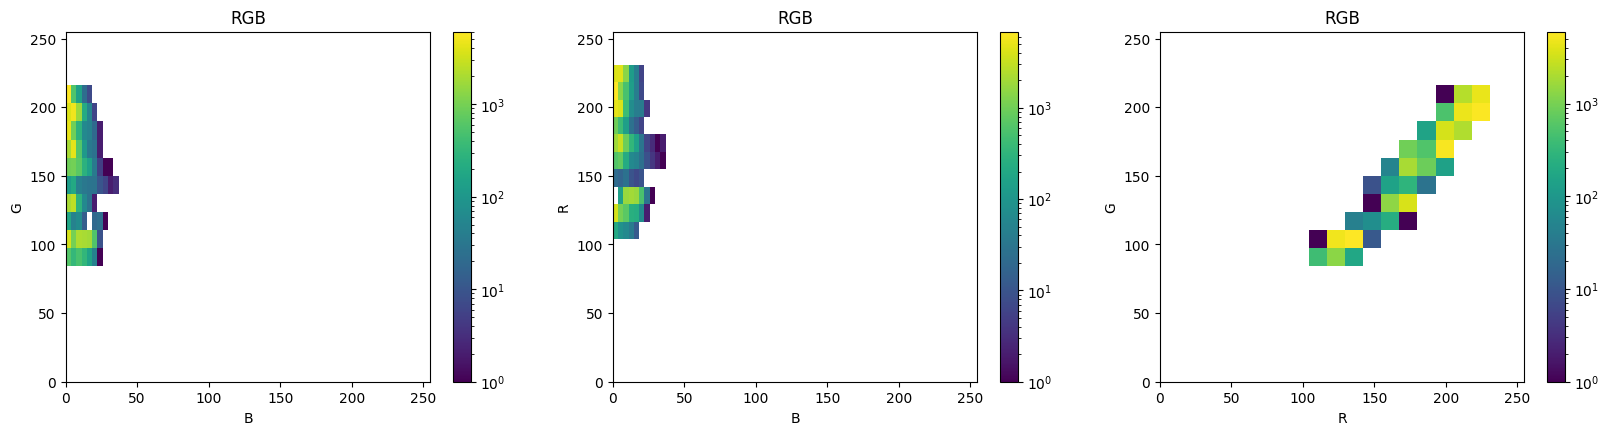

In [34]:
# Ploteamos
nbins = 10
plt.figure(figsize=[20,10])
plt.subplot(2,3,1)
plt.hist2d(B, G, bins=nbins, norm=LogNorm())
plt.xlabel('B')
plt.ylabel('G')
plt.title('RGB')
if not zoom:
    plt.xlim([0,255])
    plt.ylim([0,255])
plt.colorbar()
plt.subplot(2,3,2)
plt.hist2d(B, R, bins=nbins, norm=LogNorm())
plt.colorbar()
plt.xlabel('B')
plt.ylabel('R')
plt.title('RGB')
if not zoom:
    plt.xlim([0,255])
    plt.ylim([0,255])
plt.subplot(2,3,3)
plt.hist2d(R, G, bins=nbins, norm=LogNorm())
plt.colorbar()
plt.xlabel('R')
plt.ylabel('G')
plt.title('RGB')
if not zoom:
    plt.xlim([0,255])
    plt.ylim([0,255])

Tarea -> Sacar los density plot de los 3 otros Color Spaces y luego identificar el mejor thresh para aplicar en el código de más arriba